In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch
import numpy
import torch.utils.data
from sklearn.model_selection import train_test_split

# Display Dataset

In [2]:
import sys
sys.path.append('..')

from Datasets.MackeyGlassDataset import MackeyGlassDataset
Mglass1 = MackeyGlassDataset(1000, 5, tau=17, seed=0)

([<matplotlib.lines.Line2D at 0x1b4b2107b60>], (4995, 1))

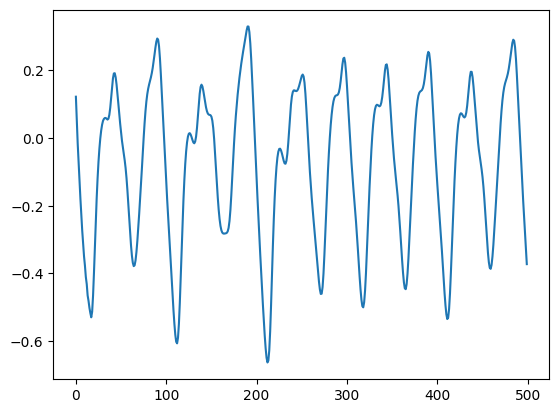

In [3]:
dataset = torch.utils.data.DataLoader(Mglass1, batch_size=1, shuffle=False)
dataset = np.array([data[0] for data in dataset]).reshape(-1, 1)
# loop through the input data (data[0]) and convert it to numpy array with shape of colomn vector

plt.plot(dataset[:500]), dataset.shape

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('CPU is available')


GPU is available


# ESN 

In [ ]:
from Models.Echostate import ESN

esn = ESN(input_dim = 1, reservoir_dim = 200, output_dim = 1)

esn.to(device)
esn.freeze_reservoir()  # Freeze reservoir weights

# Define optimizer and criterion for the readout layer
optimizer = torch.optim.Adam(esn.readout.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [6]:
inputs, targets = Mglass1[0]
inputs = (inputs - torch.mean(inputs)) / torch.std(inputs)
targets = (targets - torch.mean(targets)) / torch.std(targets)

inputs = inputs.to(device) 
targets = targets.to(device)

print(f"Model is on: {next(esn.parameters()).device}")
print(f"Inputs are on: {inputs.device}")
print(f"Targets are on: {targets.device}")

Model is on: cuda:0
Inputs are on: cuda:0
Targets are on: cuda:0


In [ ]:
losses = esn.Train(inputs, targets, epochs=100, lr=0.01, print_every=10)

Epoch 0, Loss: 0.6764741539955139
Epoch 10, Loss: 40.8007698059082
Epoch 20, Loss: 16.959300994873047
Epoch 30, Loss: 2.6267385482788086
Epoch 40, Loss: 0.5463735461235046
Epoch 50, Loss: 0.16856351494789124
Epoch 60, Loss: 0.14654995501041412
Epoch 70, Loss: 0.11581451445817947
Epoch 80, Loss: 0.02876121923327446
Epoch 90, Loss: 0.003299952717497945


device(type='cuda', index=0)

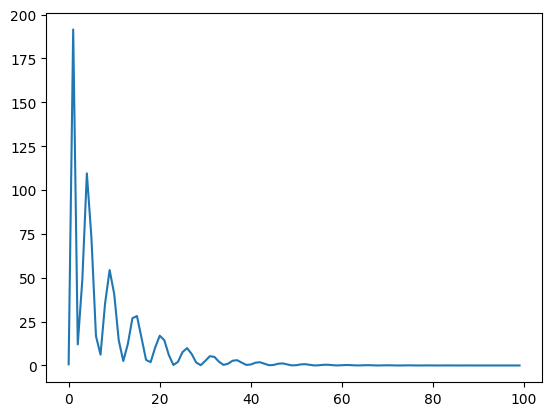

In [10]:
plt.plot(losses.cpu().detach().numpy())
inputs.device

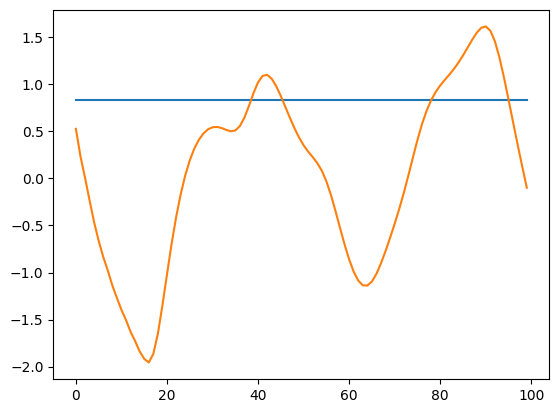

In [12]:
plt.plot(esn.Predict(inputs, 100).cpu().detach().numpy(), label='Prediction')
plt.plot(targets[:100].cpu().detach().numpy(), label='True')
plt.show()